In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('dataset.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
display(data.dtypes, data.shape, data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

(7043, 21)

None

In [15]:
data.isnull().sum()
data.duplicated().sum()

0

In [16]:
data.columns = [a.lower() for a in data.columns]
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [17]:
data.drop(['customerid'], axis = 1, inplace= True)

In [18]:
data['totalcharges'].unique()
data['totalcharges'] = data['totalcharges'].replace(' ', np.nan).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [19]:
data.dropna(inplace=True)

In [20]:
display(data['onlinesecurity'].value_counts(),
data['onlinebackup'].value_counts(),
data['deviceprotection'].value_counts(),
data['techsupport'].value_counts(),
data['streamingtv'].value_counts(),
data['streamingmovies'].value_counts())

onlinesecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

onlinebackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

deviceprotection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

techsupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

streamingtv
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

streamingmovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [21]:
replace_cols = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

for i in replace_cols :
    data[i] = data[i].replace('No internet service', 'No')

In [22]:
data['seniorcitizen'] = data['seniorcitizen'].replace({1: 'Yes', 0: 'No'})
data['seniorcitizen'].value_counts()

seniorcitizen
No     5890
Yes    1142
Name: count, dtype: int64

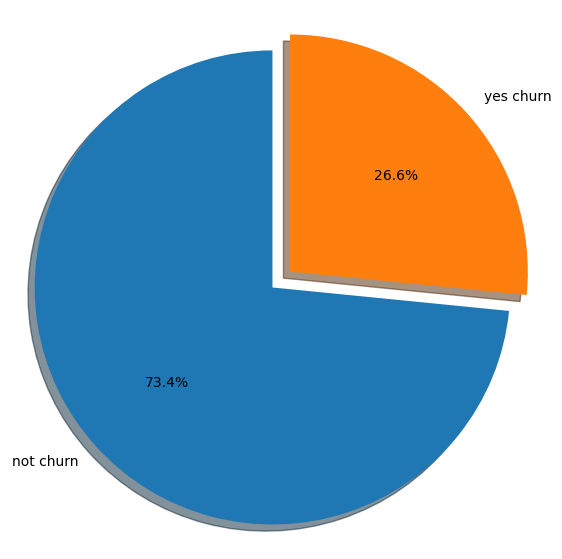

In [23]:
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(data['churn'].value_counts(), labels=('not churn', 'yes churn'), explode = [0.1,0], autopct='%1.1f%%', shadow= True, startangle = 90, labeldistance = 1.1)
plt.axis('equal')
plt.show()

In [24]:
def plot_cat(data, feature, xlabel_rotation = 0):
    fig, ax = plt.subplots(1, 2, figsize = (14,4))
    ax[0].set(xlabel = f"{feature}", ylabel = 'Number Of Changes')
    ax[1].set(xlabel = f"{feature}", ylabel = 'Number Of Changes')

    data[data.churn == 'No'][feature].value_counts().plot(kind='bar', ax = ax[0], rot = xlabel_rotation).set_title('Non Churn')
    data[data.churn == 'Yes'][feature].value_counts().plot(kind='bar', ax = ax[1], rot = xlabel_rotation).set_title('Churn')

    fig.suptitle(f'{feature} distribution in customer attrition', y = 1.02, size = 16, weight = 'bold')

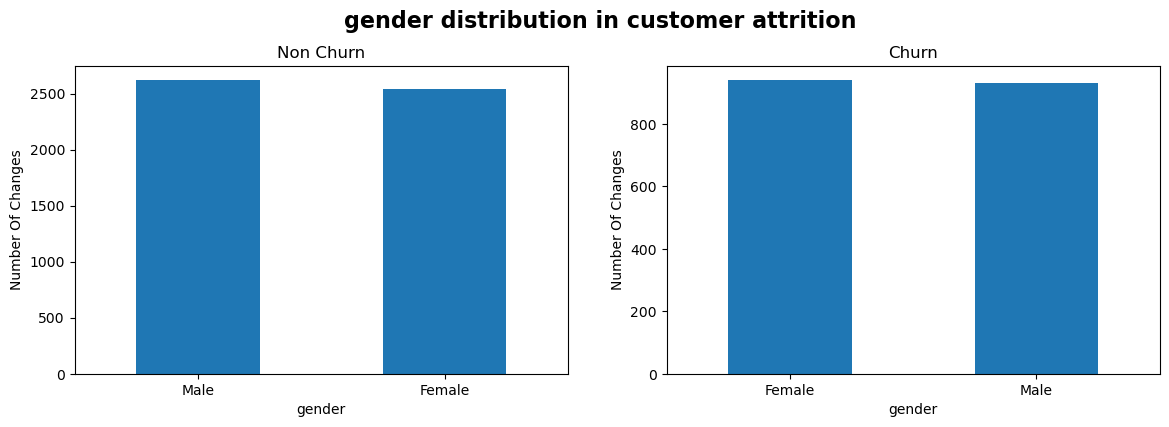

In [25]:
plot_cat(data, 'gender')

In [26]:
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']

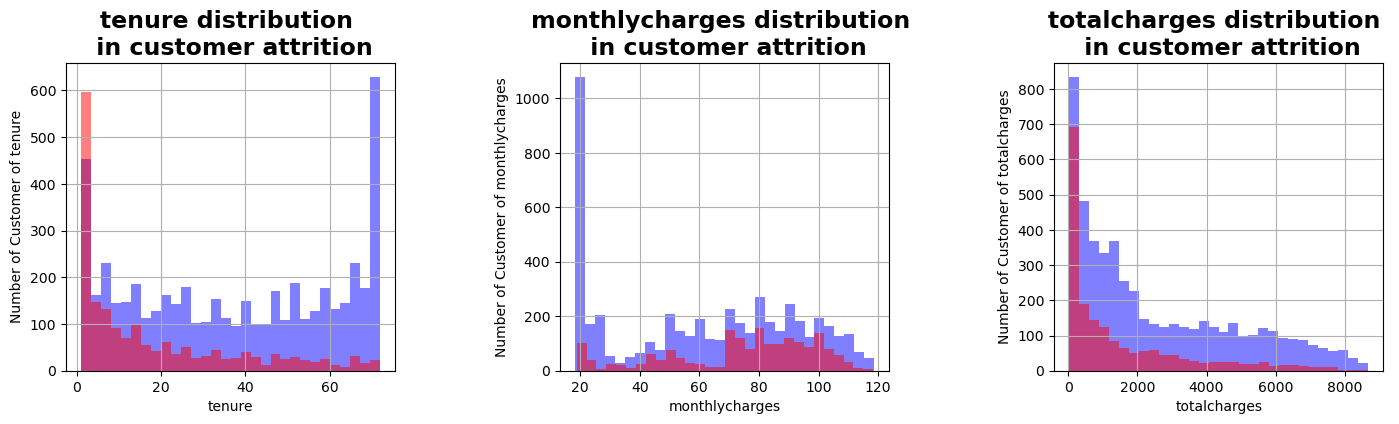

In [27]:
fig, ax = plt.subplots(1, len(numerical_features), figsize = (17,4))
fig.subplots_adjust(wspace=.5)

for feature,i in zip(numerical_features,range(len(numerical_features))):
    ax[i].set(xlabel = f'{feature}', ylabel = f'Number of Customer of {feature}')
    ax[i].set_title(f'{feature} distribution \n in customer attrition', size = 17, weight = 'bold')
    data[data.churn == 'No'][feature].hist(bins = 30, color="blue", alpha = 0.5, ax = ax[i])
    data[data.churn == 'Yes'][feature].hist(bins = 30, color="red", alpha = 0.5, ax = ax[i])

In [28]:
l = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = l.fit_transform(data[i])

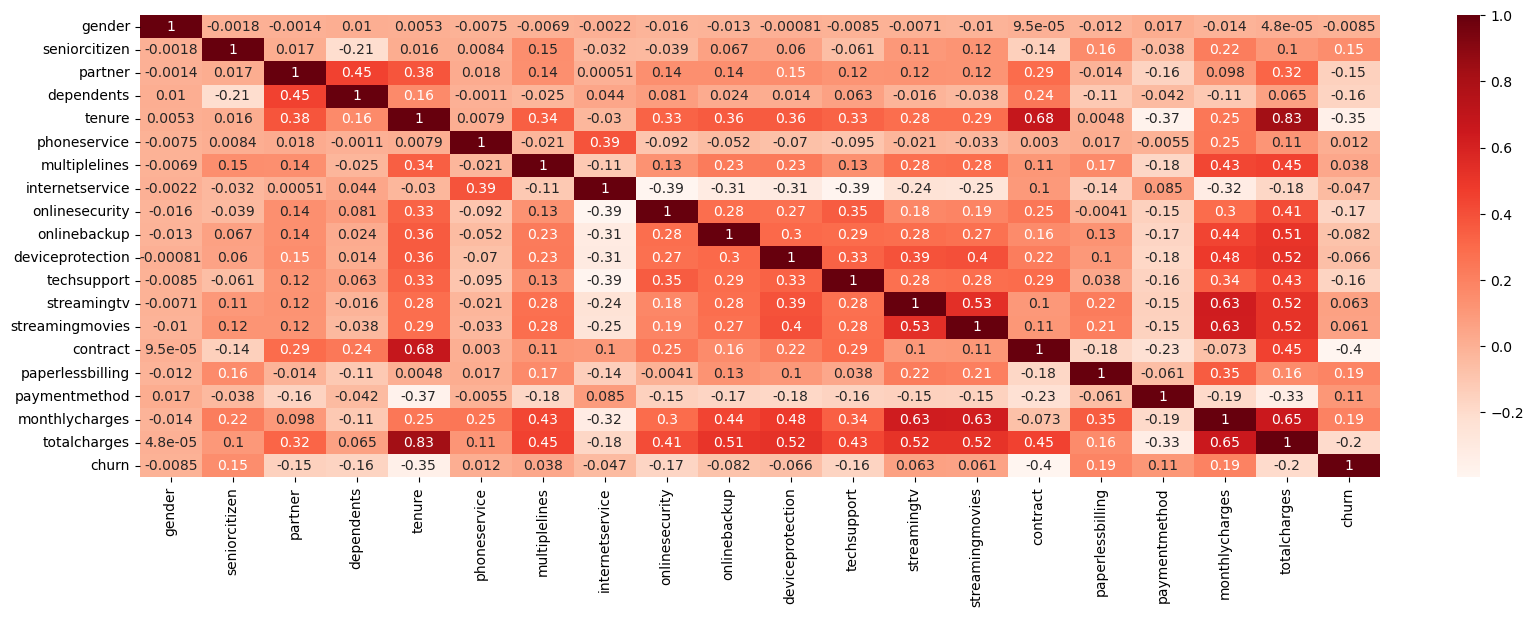

In [29]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(data.corr(), annot = True, cmap = 'Reds')
plt.show()

In [30]:
selected_columns = ['monthlycharges', 'paperlessbilling', 'seniorcitizen', 'paymentmethod', 'contract', 'tenure', 'totalcharges', 'onlinesecurity', 'techsupport', 'dependents', 'churn']

new_df = data[selected_columns]
new_df.head()

,monthlycharges,paperlessbilling,seniorcitizen,paymentmethod,contract,tenure,totalcharges,onlinesecurity,techsupport,dependents,churn
0,29.85,1,0,2,0,1,29.85,0,0,0,0
1,56.95,0,0,3,1,34,1889.50,1,0,0,0
2,53.85,1,0,3,0,2,108.15,1,0,0,1
3,42.30,0,0,0,1,45,1840.75,1,1,0,0
4,70.70,1,0,2,0,2,151.65,0,0,0,1


In [31]:
x = new_df.drop('churn', axis = 1)
y = new_df['churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7032, dtype: int32

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
xtrain

,monthlycharges,paperlessbilling,seniorcitizen,paymentmethod,contract,tenure,totalcharges,onlinesecurity,techsupport,dependents
511,106.45,1,0,2,0,61,6300.15,1,0,0
3119,85.95,1,1,1,0,32,2628.60,0,0,0
1984,90.90,1,0,0,0,14,1259.00,0,0,1
4734,80.00,0,0,1,1,39,3182.95,1,1,1
3787,95.30,1,0,2,0,58,5817.70,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6603,66.60,1,0,1,0,14,979.50,0,1,0
6327,91.25,1,0,0,1,28,2483.65,0,1,0
6909,53.55,1,0,3,0,1,53.55,1,0,0
6276,20.35,0,0,1,1,15,335.95,0,0,1


In [33]:
mms = MinMaxScaler(feature_range=(0,1))

xtrain = mms.fit_transform(xtrain)
xtest = mms.fit_transform(xtest)
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)

xtrain

,0,1,2,3,4,5,6,7,8,9
0,0.877429,1.0,0.0,0.666667,0.0,0.845070,0.724827,1.0,0.0,0.0
1,0.673144,1.0,1.0,0.333333,0.0,0.436620,0.301154,0.0,0.0,0.0
2,0.722471,1.0,0.0,0.000000,0.0,0.183099,0.143111,0.0,0.0,1.0
3,0.613852,0.0,0.0,0.333333,0.5,0.535211,0.365122,1.0,1.0,1.0
4,0.766318,1.0,0.0,0.666667,0.0,0.802817,0.669155,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5620,0.480319,1.0,0.0,0.333333,0.0,0.183099,0.110859,0.0,1.0,0.0
5621,0.725959,1.0,0.0,0.000000,0.5,0.380282,0.284428,0.0,1.0,0.0
5622,0.350274,1.0,0.0,1.000000,0.0,0.000000,0.004010,1.0,0.0,0.0
5623,0.019432,0.0,0.0,0.333333,0.5,0.197183,0.036597,0.0,0.0,1.0


In [34]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10,50,100,200,300,400,500]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 1)
grid_search.fit(xtrain, ytrain)

print('\n')
print('Hyperparameter terbaik : ', grid_search.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


Hyperparameter terbaik :  {'n_estimators': 100}


In [35]:
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(xtrain, ytrain)

y_pred = best_rf_model.predict(xtest)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy pada data validasi : ", accuracy)

Accuracy pada data validasi :  0.7810945273631841


In [36]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1037
           1       0.60      0.50      0.55       370

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [37]:
confusionMatrix = confusion_matrix(ytest, y_pred)
confusionMatrix

array([[913, 124],
       [184, 186]], dtype=int64)

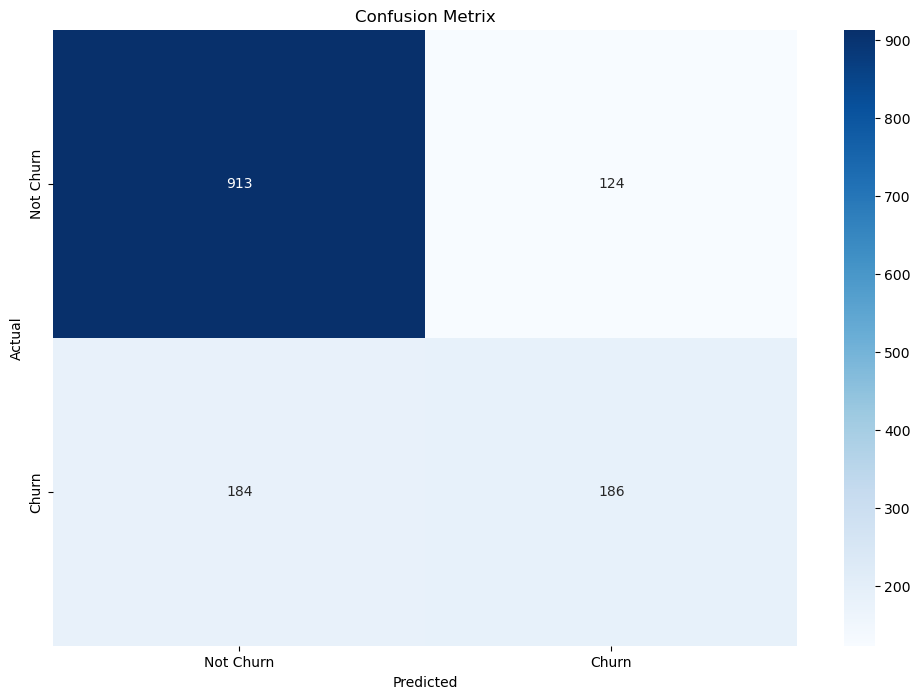

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d", cbar=True, xticklabels=("Not Churn", 'Churn'), yticklabels=("Not Churn", 'Churn'))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Metrix")
plt.show()